# Importing libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
# Delhi house data is the dataset used.
house_data = pd.read_csv('Delhi house data.csv')

In [3]:
house_data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
house_data.shape

(1259, 11)

In [5]:
house_data.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Locality', 'Parking', 'Price',
       'Status', 'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [6]:
house_data['Type'].unique()

array(['Builder_Floor', 'Apartment', nan], dtype=object)

In [7]:
house_data['Type'].value_counts()

Builder_Floor    661
Apartment        593
Name: Type, dtype: int64

In [10]:
#Dropping unnecessary columns
df1 = house_data.drop(['Type' , 'Furnishing' , 'Status' ,'Transaction','Parking'] , axis = 'columns')
df1.head()

,Area,BHK,Bathroom,Locality,Price,Per_Sqft
0,800.0,3,2.0,Rohini Sector 25,6500000,NaN
1,750.0,2,2.0,"J R Designers Floors, Rohini Sector 24",5000000,6667.0
2,950.0,2,2.0,"Citizen Apartment, Rohini Sector 13",15500000,6667.0
3,600.0,2,2.0,Rohini Sector 24,4200000,6667.0
4,650.0,2,2.0,Rohini Sector 24 carpet area 650 sqft status R...,6200000,6667.0


# Data cleaning

In [12]:
df1.dropna(inplace=True)

In [13]:
#Viewing rows with missing values
df1.isnull().sum()

Area        0
BHK         0
Bathroom    0
Locality    0
Price       0
Per_Sqft    0
dtype: int64

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 1 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       1018 non-null   float64
 1   BHK        1018 non-null   int64  
 2   Bathroom   1018 non-null   float64
 3   Locality   1018 non-null   object 
 4   Price      1018 non-null   int64  
 5   Per_Sqft   1018 non-null   float64
 6   Price_log  1018 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 95.9+ KB


In [14]:
# getting the statistical measures of the data categorical features
df1.describe()

,Area,BHK,Bathroom,Price,Per_Sqft
count,1018.000000,1018.000000,1018.000000,1.018000e+03,1018.000000
mean,1500.527974,2.797642,2.569745,2.218654e+07,15690.136542
std,1720.908043,0.965641,1.092366,2.760926e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,765.000000,2.000000,2.000000,5.147500e+06,6364.000000
50%,1150.000000,3.000000,2.000000,1.400000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.700000e+07,18000.000000
max,24300.000000,7.000000,7.000000,2.400000e+08,183333.000000


# Exploratory Data Analysis (EDA)

F:\install\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


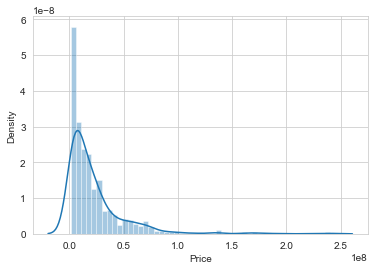

F:\install\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


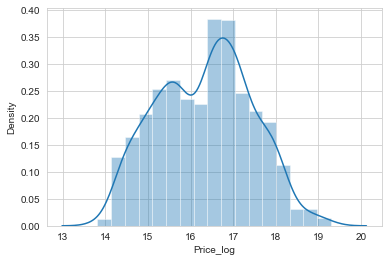

In [15]:
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt

x = df1.Price
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

df1['Price_log'] = np.log(df1.Price)
x = df1.Price_log
sns.distplot(x)
plt.show()

<AxesSubplot:>

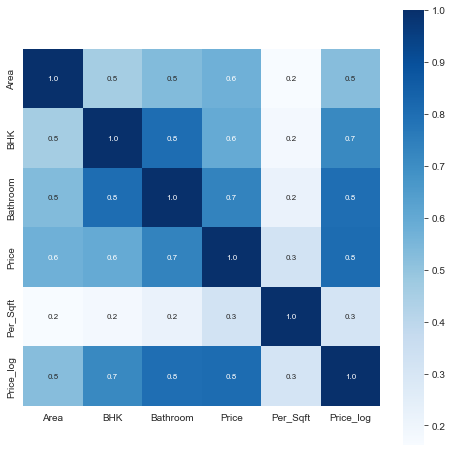

In [20]:
#Correlation (explains how one or more variables are related to each other. )
correlation = df1.corr()
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [21]:
df1['BHK'].unique()

array([2, 4, 3, 1, 6, 5, 7], dtype=int64)

In [24]:
df1.loc[20]

Area                                    850.0
BHK                                         2
Bathroom                                  2.0
Locality     Mayur Apartment, Rohini Sector 9
Price                                11000000
Per_Sqft                               6154.0
Price_log                           16.213406
Name: 20, dtype: object

# Outlier Removal

In [49]:
#Viewing tatal_sqft / bhk <300
df1[df1['Area'] / df1['BHK'] < 300].head()

,Area,BHK,Bathroom,Locality,Price,Per_Sqft,Price_log
11,870.0000,3,2.0,Rohini Sector 25,7700000,6154.0,15.856731
14,344.4448,2,2.0,Rohini Sector 8 How Auctions work? The borrowe...,3310000,6154.0,15.012459
16,550.0000,2,2.0,Rohini Sector 22,4500000,6154.0,15.319588
17,1100.0000,4,3.0,Rohini Sector 16,17000000,6154.0,16.648724
26,800.0000,3,2.0,Rohini Sector 25,7000000,8750.0,15.761421


In [47]:
#removing outliers 
df2= df1[~(df1['Area'] / df1['BHK'] < 300)]
df2.shape

(856, 7)

In [50]:
df2['Per_Sqft'].describe()

count       856.000000
mean      15951.228972
std       21449.716402
min        1259.000000
25%        6667.000000
50%       12151.000000
75%       18333.000000
max      183333.000000
Name: Per_Sqft, dtype: float64

In [32]:
#Function for removing extreme values because min=1259 and max= 183333 it is extreme
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('Locality'):
        m = np.mean(subdf.Per_Sqft)
        sd = np.std(subdf.Per_Sqft)
        reduced_df = subdf[(subdf.Per_Sqft > (m-sd)) & (subdf.Per_Sqft < (m+sd))]
        df_out = pd.concat([df_out , reduced_df] , ignore_index = True)
    return df_out

In [51]:
#Calling remove_pps_outliers 
df3 = remove_pps_outliers(df2)
df3.shape

(421, 7)

In [52]:
df3.head()

,Area,BHK,Bathroom,Locality,Price,Per_Sqft,Price_log
0,750.0,2,2.0,"Abul Fazal Enclave Part-II, Okhla",3800000,10320.0,15.150512
1,1400.0,3,2.0,Alaknanda,19000000,12500.0,16.759950
2,1100.0,2,2.0,Alaknanda,15000000,12500.0,16.523561
3,1200.0,2,2.0,Alaknanda,17500000,12500.0,16.677711
4,1400.0,2,2.0,Alaknanda,14000000,12500.0,16.454568


In [54]:
# Creating a Scatter plot function 
def plot_scatter_chart(df, Locality):
    bhk2 = df[(df.Locality == Locality ) & (df.BHK == 2)]
    bhk3 = df[(df.Locality == Locality ) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Area , bhk2.Price , color = 'blue' , label = '2 BHK' , s = 50)
    plt.scatter(bhk3.Area , bhk3.Price , marker = '+' ,  color = 'green' , label = '3 BHK' , s = 50)
    plt.xlabel('Total Square feet Area')
    plt.ylabel('Price (Lakhs Indian Rupees)')
    plt.title('Location')
    plt.legend()

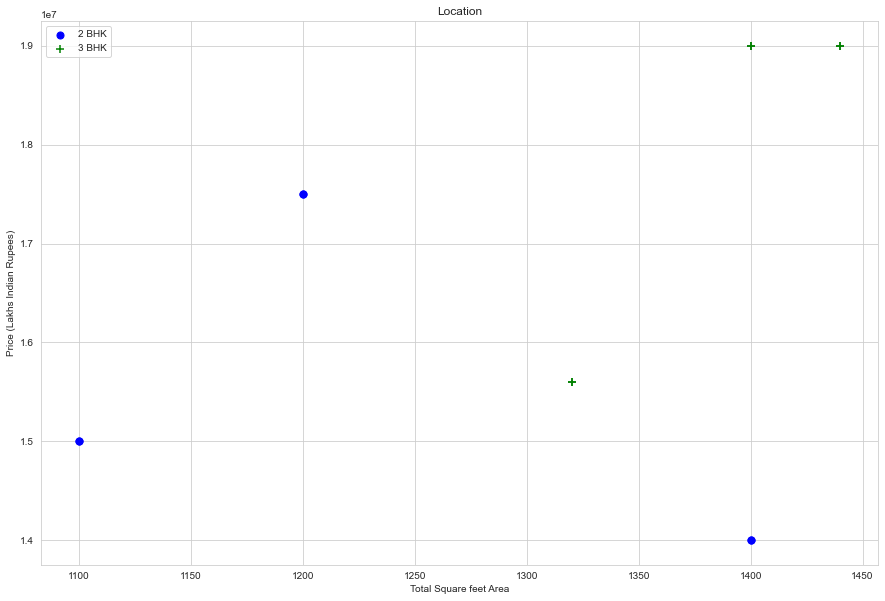

In [55]:
#Calling plot_scatter_chart
plot_scatter_chart(df3 , 'Alaknanda')

In [57]:
df3['Bathroom'].unique()

array([2., 3., 1., 5., 4., 6., 7.])

In [58]:
df3[df3['Bathroom'] > 3]

,Area,BHK,Bathroom,Locality,Price,Per_Sqft,Price_log
26,4118.0,4,5.0,Chittaranjan Park,55000000,12916.0,17.822844
29,3405.0,5,5.0,"Common Wealth Games Village, Commonwealth Game...",70000000,20558.0,18.064006
31,2090.0,3,4.0,"Common Wealth Games Village, Commonwealth Game...",44000000,21052.0,17.599700
33,2065.0,3,4.0,"Common Wealth Games Village, Commonwealth Game...",42500000,20581.0,17.565015
34,3405.0,5,4.0,"Common Wealth Games Village, Commonwealth Game...",71500000,20999.0,18.085208
...,...,...,...,...,...,...,...
394,3901.0,4,4.0,"The Leela Sky Villas, Patel Nagar",93000000,23840.0,18.348110
396,4688.0,5,4.0,"The Leela Sky Villas, Patel Nagar",135000000,28797.0,18.720785
397,3901.0,4,4.0,"The Leela Sky Villas, Patel Nagar",93000000,23840.0,18.348110
405,1750.0,4,4.0,Vasant Kunj Sector C,29000000,20833.0,17.182806


In [59]:
df3[df3.Bathroom > (df3.BHK+2)]

,Area,BHK,Bathroom,Locality,Price,Per_Sqft,Price_log
196,10350.0,4,7.0,"Maharani Bagh, New Friends Colony",160000000,15459.0,18.890684


In [70]:
df3[df3['Price'] > 170000000]
df4 = df3[~(df3['Price'] > 170000000)]
df4.shape

(421, 7)

In [75]:
df4= df4.drop(['Per_Sqft' , 'Price_log'] , axis = 'columns')
df4.head()

,Area,BHK,Bathroom,Locality,Price
0,750.0,2,2.0,"Abul Fazal Enclave Part-II, Okhla",3800000
1,1400.0,3,2.0,Alaknanda,19000000
2,1100.0,2,2.0,Alaknanda,15000000
3,1200.0,2,2.0,Alaknanda,17500000
4,1400.0,2,2.0,Alaknanda,14000000


# One- hot encoding

In [76]:
#One - Hot Encoding In our dataset we have location column which is not numeric we know that our machine learning models work on numeric data only.We will convert the data in location column to numeric data using one - hot encoding
dummies = pd.get_dummies(df4['Locality'])
dummies.head(3)

,"Abul Fazal Enclave Part-II, Okhla",Alaknanda,"Andheria Mor, Mehrauli","Ashirwad Apartments, Dwarka Sector 12",Budh Vihar,Chittaranjan Park,"Common Wealth Games Village, Commonwealth Games Village 2010",Commonwealth Games Village 2010,"DDA Flats Block A, Dilshad Garden","DDA Flats Sector E Pocket 1, Vasant Kunj",...,"Sukhdev Vihar, Okhla",Sultanpur,Sultanpur Extension,"Sunny Valley Apartments, Dwarka","The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Vasant Kunj,Vasant Kunj Sector C,"Yamuna Vihar, Shahdara"
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df5= pd.concat([df4, dummies] , axis = 'columns')
df5.head()

,Area,BHK,Bathroom,Locality,Price,"Abul Fazal Enclave Part-II, Okhla",Alaknanda,"Andheria Mor, Mehrauli","Ashirwad Apartments, Dwarka Sector 12",Budh Vihar,...,"Sukhdev Vihar, Okhla",Sultanpur,Sultanpur Extension,"Sunny Valley Apartments, Dwarka","The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Vasant Kunj,Vasant Kunj Sector C,"Yamuna Vihar, Shahdara"
0,750.0,2,2.0,"Abul Fazal Enclave Part-II, Okhla",3800000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1400.0,3,2.0,Alaknanda,19000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1100.0,2,2.0,Alaknanda,15000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,2.0,Alaknanda,17500000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1400.0,2,2.0,Alaknanda,14000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df6 = df5.drop('Locality' , axis = 'columns')
df6.head()

,Area,BHK,Bathroom,Price,"Abul Fazal Enclave Part-II, Okhla",Alaknanda,"Andheria Mor, Mehrauli","Ashirwad Apartments, Dwarka Sector 12",Budh Vihar,Chittaranjan Park,...,"Sukhdev Vihar, Okhla",Sultanpur,Sultanpur Extension,"Sunny Valley Apartments, Dwarka","The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Vasant Kunj,Vasant Kunj Sector C,"Yamuna Vihar, Shahdara"
0,750.0,2,2.0,3800000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1400.0,3,2.0,19000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1100.0,2,2.0,15000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,2.0,17500000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1400.0,2,2.0,14000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# train_test_split

In [87]:
#Dropping price column
X = df6.drop('Price' , axis = 'columns')
X.head()

,Area,BHK,Bathroom,"Abul Fazal Enclave Part-II, Okhla",Alaknanda,"Andheria Mor, Mehrauli","Ashirwad Apartments, Dwarka Sector 12",Budh Vihar,Chittaranjan Park,"Common Wealth Games Village, Commonwealth Games Village 2010",...,"Sukhdev Vihar, Okhla",Sultanpur,Sultanpur Extension,"Sunny Valley Apartments, Dwarka","The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Vasant Kunj,Vasant Kunj Sector C,"Yamuna Vihar, Shahdara"
0,750.0,2,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1400.0,3,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1100.0,2,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1400.0,2,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
#Making a new DataFrame for price
y = df6.Price
y.head()

0     3800000
1    19000000
2    15000000
3    17500000
4    14000000
Name: Price, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 10)

# Applying model on test and train data

In [101]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train , y_train)
lr_clf.score(X_test,y_test)

0.7745626761060431

# Finding best model using GridSearchCv

In [109]:
#Finding the best model 
from sklearn.model_selection import GridSearchCV

#ignoring  warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

#Function to choose the best model
def find_best_model(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }

    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores , columns = ['model' , 'best_score' , 'best_params'])

In [110]:
#Calling find_best_model
find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,-1.962133e+17,{'normalize': False}
1,lasso,7.231491e-01,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,7.836162e-01,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


Random Forest Regressor


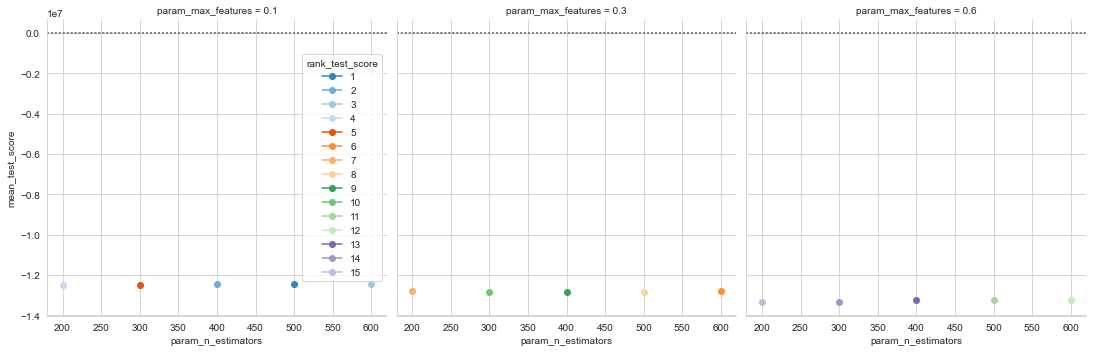

In [129]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid =  {'n_estimators':[200, 300, 400, 500, 600],
               'max_features':[0.1, 0.3, 0.6]
              } 
RandForest = RandomForestRegressor(n_jobs= -1, random_state = 0, bootstrap=True)
Tuned_RandForest = GridSearchCV(estimator=RandForest, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)
Tuned_RandForest.fit(X_train, y_train)
Results = pd.DataFrame(Tuned_RandForest.cv_results_)
Results_Best = Results.loc[Results.rank_test_score==1]
print('Random Forest Regressor')
col = ['param_max_features']
for col in col:
    grid = sns.FacetGrid(Results, col=col, hue='rank_test_score', palette="tab20c", legend_out=False,
                         col_wrap=5, height=5)
    grid.map(plt.axhline, y=0, ls=":", c=".5")
    grid.map(plt.plot, "param_n_estimators", "mean_test_score", marker="o")
    grid.fig.tight_layout(w_pad=1)
    grid.add_legend()   

In [132]:
def predict_price(location , sqft , bath , bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index>= 0:
        x[loc_index] = 1
    print("%.2f" %lr_clf.predict([x])[0])

# Predictions

In [133]:
predict_price('Abul Fazal Enclave Part-II, Okhla' , 1000 , 2 ,2 )

4303030.73


In [134]:
predict_price('Chittaranjan Park' , 1000 , 2 ,2 )

3403536.57
